# RIDGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [4]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
boston_df['Price']=boston.target

In [11]:
X = boston_df.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]

In [12]:
y = boston_df['Price']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
print(train_score)
print(test_score)

0.7419034960343789
0.7147895265576851


In [20]:
train_score = rr.score(X_train,y_train)
test_score = rr.score(X_test,y_test)
print('rr :',train_score)
print('rr :',test_score)

rr : 0.7419030253527293
rr : 0.7146125373123909


In [21]:
train_score = rr100.score(X_train,y_train)
test_score = rr100.score(X_test,y_test)
print('rr 100 :',train_score)
print('rr 100 :',test_score)

rr 100 : 0.7172809669938278
rr 100 : 0.6805765856921935


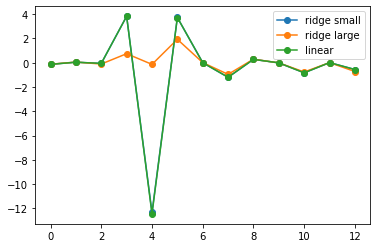

In [34]:
plt.plot(rr.coef_,label = 'ridge small',marker = 'o',linestyle = None)
plt.plot(rr100.coef_,label = 'ridge large',marker = 'o',linestyle = None)
plt.plot(lr.coef_,label='linear',marker = 'o',linestyle = None)
plt.legend()

#### in the above diagram we observe that for small value of alpha the values of the coefficient remains constant
#### but as value of alpha increases we see a significant shrinkage in parameters between values 2 to 6

# LASSO

In [35]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer

In [36]:
cancer = load_breast_cancer()

In [37]:
X = cancer.data
y = cancer.target

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=31)

In [48]:
lasso = Lasso()
lasso.fit(X_train,y_train)
print('lasso_train_score:',lasso.score(X_train,y_train))
print('lasso_test_score:',lasso.score(X_test,y_test))
print('number_of_coefficients_used :',np.sum(lasso.coef_!=0))

lasso_train_score: 0.5600974529893081
lasso_test_score: 0.5832244618818156
number_of_coefficients_used : 4


In [53]:
lasso001 = Lasso(alpha=0.01,max_iter=10e5)
lasso001.fit(X_train,y_train)
print('lasso_train_score001:',lasso001.score(X_train,y_train))
print('lasso_test_score001:',lasso001.score(X_test,y_test))
print('number_of_coefficients_used001:',np.sum(lasso001.coef_!=0))

lasso_train_score001: 0.7037865778498826
lasso_test_score001: 0.6641831577726228
number_of_coefficients_used001: 10


In [55]:
lasso00001 = Lasso(alpha=0.0001,max_iter=10e5)
lasso00001.fit(X_train,y_train)
print('lasso_train_score001:',lasso00001.score(X_train,y_train))
print('lasso_test_score001:',lasso00001.score(X_test,y_test))
print('number_of_coefficients_used001:',np.sum(lasso00001.coef_!=0))

lasso_train_score001: 0.7754092006936699
lasso_test_score001: 0.7318608210757908
number_of_coefficients_used001: 22


In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('linear_train_score:',lr.score(X_train,y_train))
print('linear_test_score:',lr.score(X_test,y_test))


linear_train_score: 0.7842206194055068
linear_test_score: 0.7329325010888661


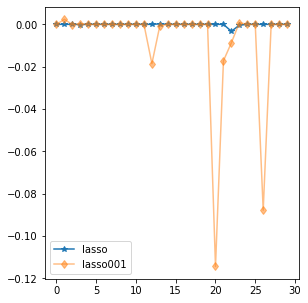

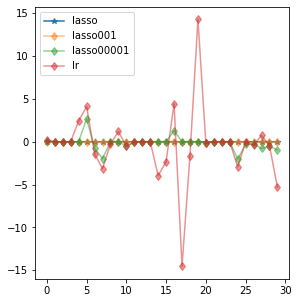

In [69]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,marker = '*',label='lasso')
plt.plot(lasso001.coef_,marker='d',label='lasso001',alpha=0.5)
plt.legend()
plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
plt.plot(lasso.coef_,marker = '*',label='lasso')
plt.plot(lasso001.coef_,marker='d',label='lasso001',alpha=0.5)
plt.plot(lasso00001.coef_,marker='d',label='lasso00001',alpha=0.5)
plt.plot(lr.coef_,marker='d',label='lr',alpha=0.5)
plt.legend()